In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
for i in['ph','Sulfate','Trihalomethanes']:
  data[i]=data[i].fillna(data[i].median())
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

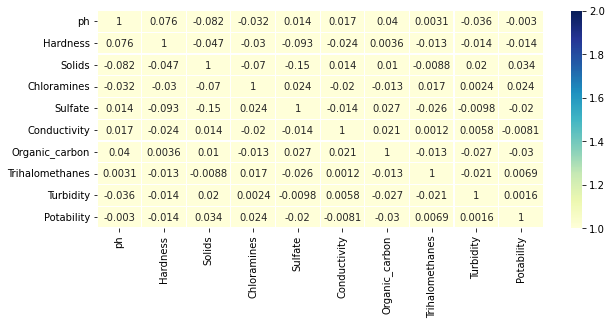

In [6]:
# find the correlation using corr function

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=2, vmax=1, annot=True,linewidths=0.2,cmap='YlGnBu')

In [7]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
x=data.drop('Hardness',axis=1)
y=data['Hardness']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [10]:
# make linear regression model
from sklearn import linear_model
# create instance of the model
lr=linear_model.LinearRegression()
# now fitting the instance created to the training data and creating the linear regression model and store into another variable
model=lr.fit(x_train,y_train)

In [11]:
# predict the output
predictions=model.predict(x_test)

In [12]:
print(y_test)

2947    183.521107
2782    188.913541
1644    224.058877
70      183.089310
2045    179.240661
           ...    
2580    190.551572
2627    217.944979
2246    229.174987
7       203.361523
3132    185.909303
Name: Hardness, Length: 819, dtype: float64


In [13]:
print(predictions)

[197.50862067 192.9823283  202.52838319 208.58264467 192.44645789
 201.05805036 192.75003963 200.16808983 198.55944151 192.91197173
 200.0573709  196.85839766 204.73477937 197.54822144 202.20273527
 187.88790318 199.1005375  191.44547681 200.88102476 200.66312151
 195.39868789 199.7377508  198.49019712 193.06384209 196.20455321
 198.57744711 198.19461669 195.98772439 194.33455073 195.71754481
 210.1178145  202.77748246 190.41991206 195.7735156  188.75303066
 191.11886917 197.3943906  194.38614965 193.97664237 198.36098264
 195.8630239  196.44806956 185.20716616 199.08569087 200.79241636
 202.09653893 195.78739047 198.30076679 194.27848557 192.40275764
 201.21812724 201.45518902 197.84156677 195.28545689 186.8170608
 186.30749779 193.51557057 198.51113812 193.1924321  193.9632953
 203.51734872 200.11361774 199.91392789 202.19861639 200.25543242
 192.64602256 202.91395738 183.71595663 197.30885244 191.77229013
 196.42953203 194.94564021 197.9103275  198.44649353 200.81533376
 196.5931076

In [14]:
from sklearn.metrics import  mean_squared_error
print('MSC is:', mean_squared_error(y_test,predictions))

MSC is: 1079.4866749287526
